In [2]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
#import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
def print_df(df):
    return df.style.set_properties(**{'max-width': '300px', 'font-size': '12pt'})

In [4]:
df=pd.read_csv('insurance.csv')
print_df(df.head())
my_pal_sex = {'male':'blue', 'female':'pink'}
my_pal_smoker = {'yes':'red', 'no':'green'}

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

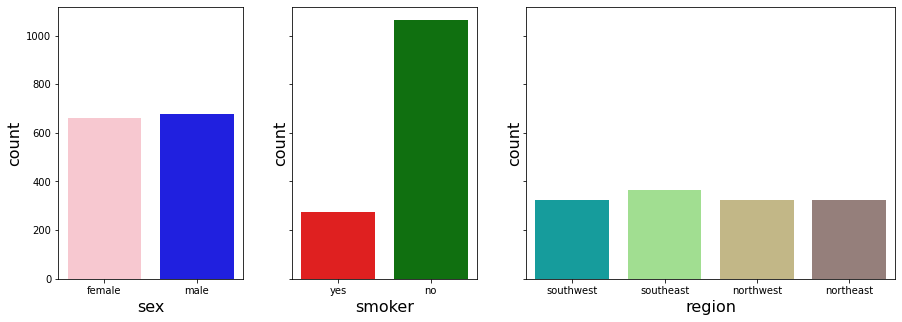

In [5]:
f,(ax1, ax2, ax3)= plt.subplots(1,3, sharey=True, figsize=(15,5), gridspec_kw={"width_ratios": (.25,.25,.5)})

sns.countplot(df.sex, palette = my_pal_sex, ax=ax1)
sns.countplot(df.smoker, palette = my_pal_smoker, ax=ax2)
sns.countplot(df.region, palette = "terrain", ax=ax3)
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.xaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)
ax3.xaxis.label.set_size(16)
ax3.yaxis.label.set_size(16)
plt.show()

In [6]:
print_df(round(df.describe(),1))

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.200000,30.700000,1.100000,13270.400000
std,14.000000,6.100000,1.200000,12110.000000
min,18.000000,16.000000,0.000000,1121.900000
25%,27.000000,26.300000,0.000000,4740.300000
50%,39.000000,30.400000,1.000000,9382.000000
75%,51.000000,34.700000,2.000000,16639.900000
max,64.000000,53.100000,5.000000,63770.400000


from the above observation we see that, mean and median of age,bmi and children variables is approx equal

#data exploration

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

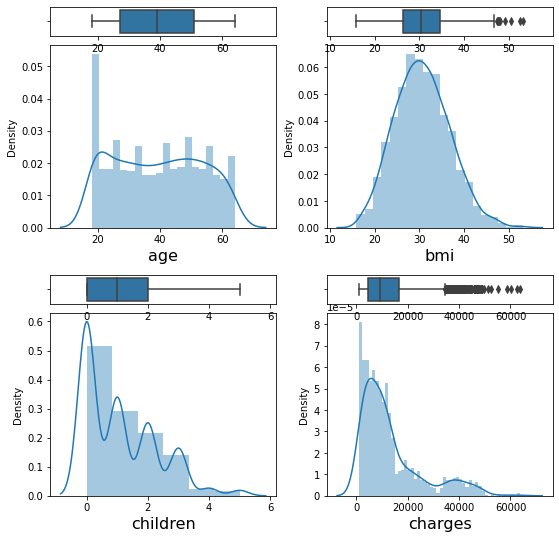

In [7]:
fig=plt.figure(figsize=(9,9))
grid=plt.GridSpec(13,13, wspace=0.4, hspace=0.3)


age_hist=fig.add_subplot(grid[1:6,:6])
age_box=fig.add_subplot(grid[0,:6], sharex=age_hist)


bmi_hist=fig.add_subplot(grid[1:6,7:13])
bmi_box=fig.add_subplot(grid[0,7:13], sharex=bmi_hist)


children_hist=fig.add_subplot(grid[8:13,:6])
children_box=fig.add_subplot(grid[7,:6], sharex=children_hist)


charges_hist=fig.add_subplot(grid[8:13,7:13])
charges_box=fig.add_subplot(grid[7,7:13], sharex=charges_hist)



sns.boxplot(df["age"], ax=age_box)
sns.distplot(df["age"], ax=age_hist, bins=20)
age_box.set(xlabel='')
age_hist.xaxis.label.set_size(16)

sns.boxplot(df["bmi"], ax=bmi_box)
sns.distplot(df["bmi"],ax= bmi_hist,bins=20)
bmi_box.set(xlabel='')
bmi_hist.xaxis.label.set_size(16)

sns.boxplot(df["children"], ax=children_box)
sns.distplot(df["children"],ax=children_hist, bins=6)
children_box.set(xlabel='')
children_hist.xaxis.label.set_size(16)

sns.boxplot(df["charges"],ax=charges_box)
sns.distplot(df["charges"], ax=charges_hist,bins=50)
charges_box.set(xlabel='')
charges_hist.xaxis.label.set_size(16)

plt.show()

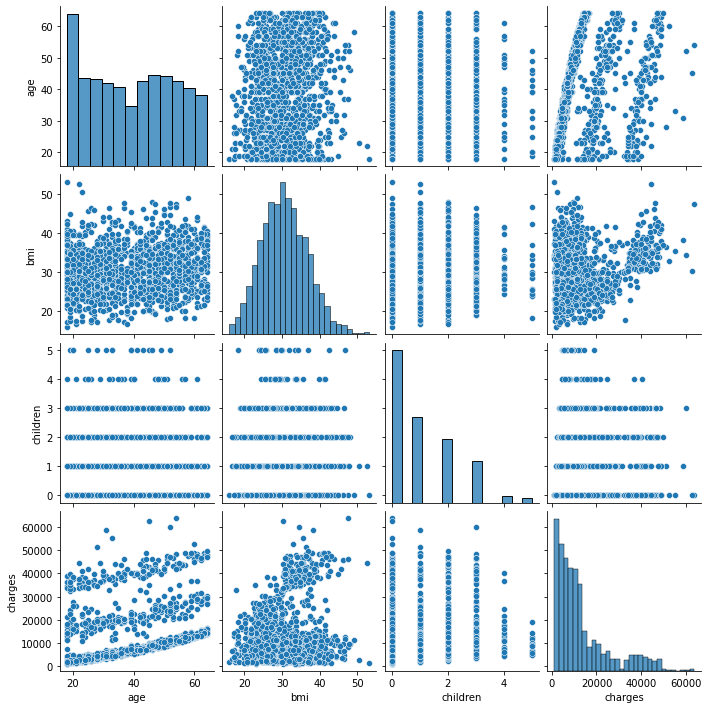

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


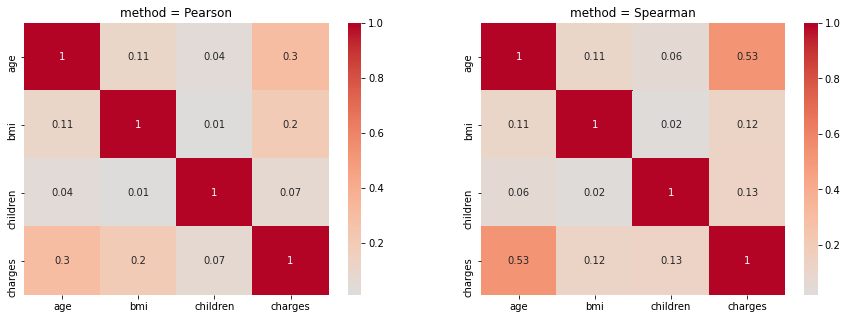

In [10]:
f2, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.heatmap(round(df.corr(),2), cmap='coolwarm', center=0, annot = True, ax=ax1)
sns.heatmap(round(df.corr(method='spearman'),2), cmap='coolwarm', center=0, annot = True, ax=ax2)

ax1.xaxis.label.set_size(16)
ax2.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)

ax1.title.set_text('method = Pearson')
ax2.title.set_text('method = Spearman')

plt.show()

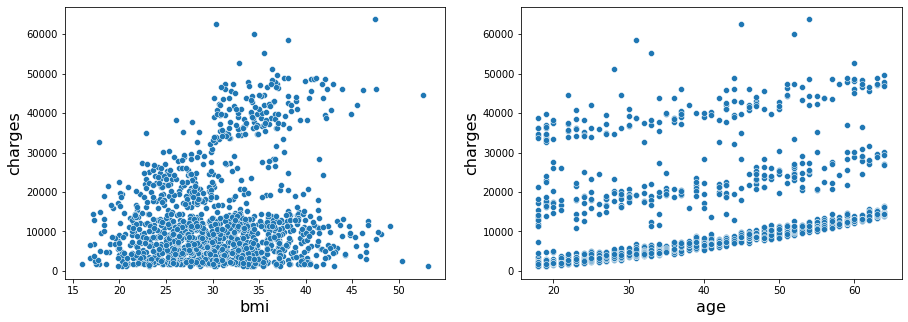

In [11]:
f3, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(data=df, x='bmi', y='charges',ax=ax1)
sns.scatterplot(data=df, x='age', y='charges', ax=ax2)

ax1.xaxis.label.set_size(16)
ax2.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)

plt.show()

In [12]:
url='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4681110/'
def status_check(url):
    import requests
    r=requests.get(url)
    if r.status_code<300:
        print("request was successful")
    elif r.status_code>=400 and r.status_code<500:
        print('request failed because it is non-existant or forbidden')
    else: print('blablabla')
    return r

In [13]:
def get_soup(url):
    r=status_check(url)
    soup = BeautifulSoup(r.content)
    return soup

In [14]:
soup=get_soup(url)

request was successful


In [15]:
age_men=[i.text for i in soup.select('td:first-child')]
optimal_BMI_men=[i.text for i in soup.select('td:nth-child(2)')]
acceptable_BMI_men=[i.text for i in soup.select('td:nth-child(3)')]
age_women=[i.text for i in soup.select('td:nth-child(4)')]
optimal_BMI_women=[i.text for i in soup.select('td:nth-child(5)')]
acceptable_BMI_women=[i.text for i in soup.select('td:nth-child(6)')]

In [17]:
BMIs=pd.DataFrame([age_men, optimal_BMI_men, acceptable_BMI_men, age_women, optimal_BMI_women, acceptable_BMI_women]).T

In [18]:
BMIs.columns=['male.age', 'male.optimal', 'male.acceptable', 'female.age','female.optimal','female.acceptable']

In [19]:
BMIs

,male.age,male.optimal,male.acceptable,female.age,female.optimal,female.acceptable
0,18–34,23.0–25.9,21.0–28.9,18–34,15.5–24.9c,15.5–25.9c
1,35–44,23.0–26.9,22.0–28.9,35–44,19.0–23.9,17.5–25.9
2,45–54,24.0–27.9,23.0–28.9,45–49,20.0–25.9,19.0–26.9
3,,,,50–54,22.0–26.9,21.0–27.9
4,55–64,24.0–28.9,23.0–31.4,55–64,23.0–27.9,22.0–29.9
5,65–74,25.0–28.9,23.0–31.4,65–74,24.0–28.9,22.0–31.4
6,75–99,25.0–32.9,24.0–34.9,75–99,24.0–29.9,22.0–36.4d


In [20]:
#droping column male.age
BMIs=BMIs.drop(columns=['male.age'])

In [21]:
#female.age will be the common age column
BMIs=BMIs.rename(columns={'female.age':'age'})

In [23]:
#reorder the columns
BMIs=BMIs[['age', 'male.optimal', 'male.acceptable', 'female.optimal','female.acceptable']]

In [24]:
#put NaN where there is an empty string ('')
BMIs=BMIs.applymap(lambda y: np.nan if len(y)==0 else y)

In [25]:
#Then fill the NaN with the value from previous row
BMIs=BMIs.ffill(axis=0)

In [26]:
BMIs

,age,male.optimal,male.acceptable,female.optimal,female.acceptable
0,18–34,23.0–25.9,21.0–28.9,15.5–24.9c,15.5–25.9c
1,35–44,23.0–26.9,22.0–28.9,19.0–23.9,17.5–25.9
2,45–49,24.0–27.9,23.0–28.9,20.0–25.9,19.0–26.9
3,50–54,24.0–27.9,23.0–28.9,22.0–26.9,21.0–27.9
4,55–64,24.0–28.9,23.0–31.4,23.0–27.9,22.0–29.9
5,65–74,25.0–28.9,23.0–31.4,24.0–28.9,22.0–31.4
6,75–99,25.0–32.9,24.0–34.9,24.0–29.9,22.0–36.4d


In [27]:
BMIs=BMIs.apply(lambda x: x.str.split('–'))

In [28]:
def string_to_float(lst):
    lst2=[]
    for i in lst:
        if not i.isdigit():
            i=re.sub(r"[a-z]", "", i)
        lst2.append(float(i))
    return lst2

In [29]:
BMIs=BMIs.applymap(lambda y: string_to_float(y))

In [30]:
print_df(BMIs)

,age,male.optimal,male.acceptable,female.optimal,female.acceptable
0,"[18.0, 34.0]","[23.0, 25.9]","[21.0, 28.9]","[15.5, 24.9]","[15.5, 25.9]"
1,"[35.0, 44.0]","[23.0, 26.9]","[22.0, 28.9]","[19.0, 23.9]","[17.5, 25.9]"
2,"[45.0, 49.0]","[24.0, 27.9]","[23.0, 28.9]","[20.0, 25.9]","[19.0, 26.9]"
3,"[50.0, 54.0]","[24.0, 27.9]","[23.0, 28.9]","[22.0, 26.9]","[21.0, 27.9]"
4,"[55.0, 64.0]","[24.0, 28.9]","[23.0, 31.4]","[23.0, 27.9]","[22.0, 29.9]"
5,"[65.0, 74.0]","[25.0, 28.9]","[23.0, 31.4]","[24.0, 28.9]","[22.0, 31.4]"
6,"[75.0, 99.0]","[25.0, 32.9]","[24.0, 34.9]","[24.0, 29.9]","[22.0, 36.4]"


In [31]:
BMIs.to_csv('BMIs.csv', index=False)

In [32]:
def bmi_range(age,sex,bmi):
    for x,y,z in zip(BMIs['age'],BMIs[f'{sex}.optimal'], BMIs[f'{sex}.acceptable']):
        if age in pd.Interval(left=x[0], right=x[1], closed='both'):
            if bmi in pd.Interval(left=y[0], right=y[1], closed='both'):
                return 'optimal'
            elif bmi in pd.Interval(left=z[0], right=z[1], closed='both'):
                return 'acceptable'
            else:
                if bmi < z[0]:
                    return 'too low'
                else : 
                    return 'too high'

In [33]:
df['bmi_range']=df.apply(lambda row: bmi_range(row['age'], row['sex'], row['bmi']),axis=1)

In [34]:
print_df(df.sample(10))

,age,sex,bmi,children,smoker,region,charges,bmi_range
1001,24,male,32.700000,0,yes,southwest,34472.841000,too high
77,21,male,35.530000,0,no,southeast,1532.469700,too high
696,53,female,32.300000,2,no,northeast,29186.482360,too high
492,18,female,25.080000,0,no,northeast,2196.473200,acceptable
346,33,male,35.750000,2,no,southeast,4889.999500,too high
1099,25,female,33.990000,1,no,southeast,3227.121100,too high
517,45,male,30.495000,2,no,northwest,8413.463050,too high
549,43,female,46.200000,0,yes,southeast,45863.205000,too high
950,57,male,18.335000,0,no,northeast,11534.872650,too low
1202,22,male,32.110000,0,no,northwest,2055.324900,too high


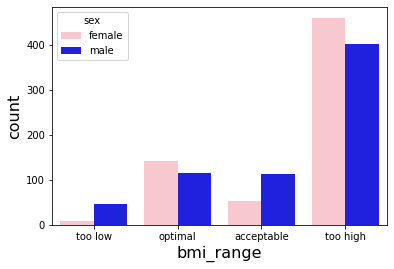

In [35]:
fig2=sns.countplot(x='bmi_range', hue='sex', palette = my_pal_sex, data=df, 
              order=['too low', 'optimal', 'acceptable', 'too high']);
fig2.xaxis.label.set_size(16)
fig2.yaxis.label.set_size(16)

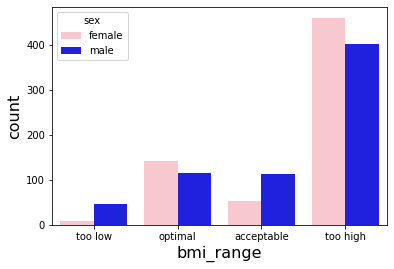

In [36]:
fig2.figure

In [37]:
df2=round(df[['age', 'children', 'charges']].groupby(df.bmi_range).mean(),1)
print_df(df2.reindex(['too low', 'optimal', 'acceptable', 'too high']))

,age,children,charges
bmi_range,,,
too low,40.200000,0.800000,9339.100000
optimal,40.300000,1.100000,11781.400000
acceptable,37.900000,1.200000,11395.200000
too high,39.100000,1.100000,14319.600000


In [38]:
df.groupby(df.sex).mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [39]:
print_df(round(df.groupby(df.smoker).mean(),1))

,age,bmi,children,charges
smoker,,,,
no,39.400000,30.700000,1.100000,8434.300000
yes,38.500000,30.700000,1.100000,32050.200000


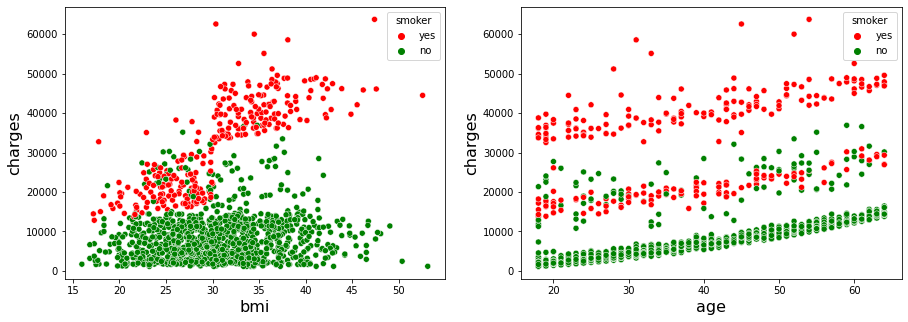

In [40]:
fig3, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(data=df, x='bmi', y='charges',hue='smoker',palette = my_pal_smoker, ax=ax1)
sns.scatterplot(data=df, x='age', y='charges',hue='smoker', palette = my_pal_smoker, ax=ax2)
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.xaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)
plt.show()

In [41]:
df.groupby(df.region).mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


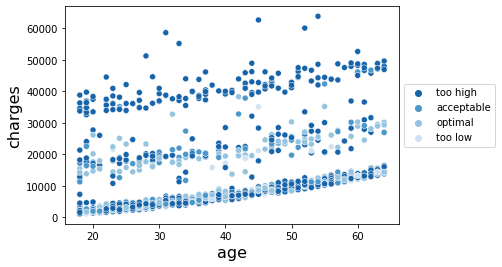

In [42]:
fig4=sns.scatterplot(data=df, x='age', y='charges', hue='bmi_range', palette="Blues_r")
fig4.xaxis.label.set_size(16)
fig4.yaxis.label.set_size(16)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

In [43]:
df['smoking and bmi']=df.apply(lambda row: 'smoker and high bmi' if (row.smoker=='yes')&(row.bmi_range=='too high') else 'smoker and bmi ok' if (row.smoker=='yes')&(row.bmi_range!='too high') else 'non smoker and high bmi' if (row.smoker=='no')&(row.bmi_range=='too high') else 'non smoker and bmi ok' , axis=1)

In [44]:
my_pal_smoke_bmi={'smoker and high bmi':'red', 'smoker and bmi ok': 'orange', 'non smoker and high bmi': 'purple', 'non smoker and bmi ok': 'green'}

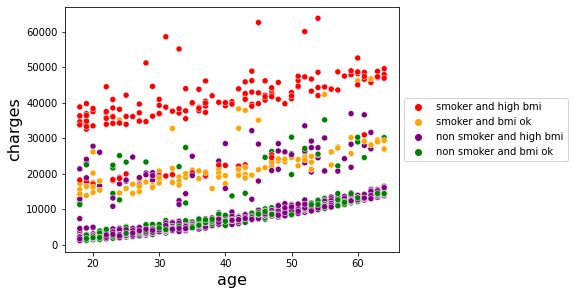

In [45]:
fig5=plt.figure(figsize=(6,4.5))

axe=sns.scatterplot(data=df, x='age', y='charges',
                hue_order = ['smoker and high bmi','smoker and bmi ok','non smoker and high bmi', 'non smoker and bmi ok'], 
                hue='smoking and bmi', palette=my_pal_smoke_bmi);
fig5.set
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
axe.xaxis.label.set_size(16)
axe.yaxis.label.set_size(16)
plt.show()

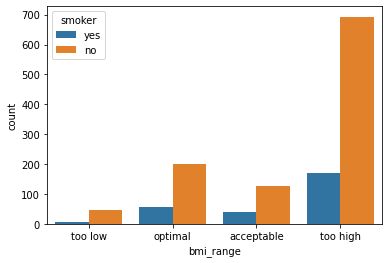

In [46]:
sns.countplot(x='bmi_range', hue='smoker', data=df, order=['too low', 'optimal', 'acceptable', 'too high']);



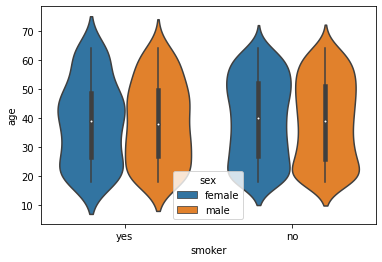

In [47]:
sns.violinplot(x='smoker', y='age', data=df, hue='sex');

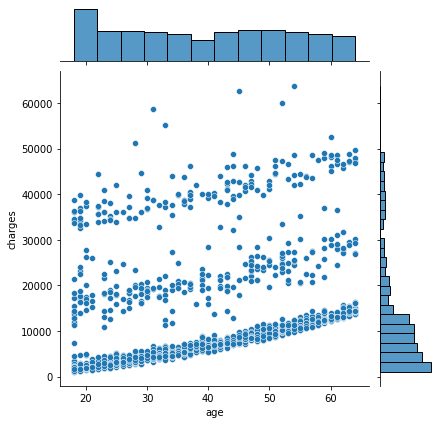

In [48]:
sns.jointplot(x='age', y='charges', data=df);

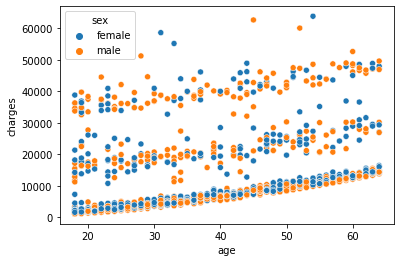

In [49]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex');

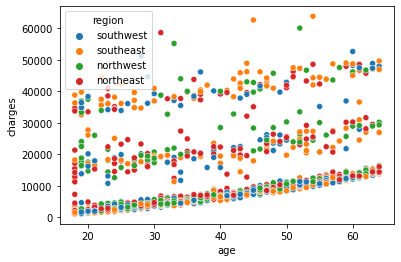

In [50]:
sns.scatterplot(data=df, x='age', y='charges', hue='region');

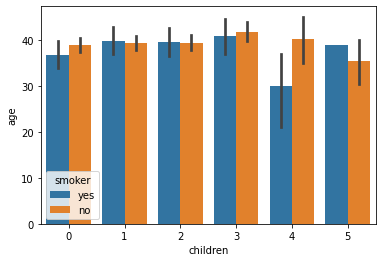

In [51]:
sns.barplot(data=df, x='children', y='age', hue='smoker');

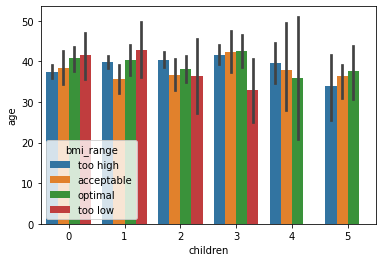

In [52]:
sns.barplot(data=df, x='children', y='age', hue='bmi_range');

In [54]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_range', 'smoking and bmi'],
      dtype='object')

In [55]:
#features
X=df[['age','sex','smoker','bmi','children','region']]

#predicted variable
y=df['charges']

In [57]:
X.head()


,age,sex,smoker,bmi,children,region
0,19,female,yes,27.900,0,southwest
1,18,male,no,33.770,1,southeast
2,28,male,no,33.000,3,southeast
3,33,male,no,22.705,0,northwest
4,32,male,no,28.880,0,northwest


In [58]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [72]:
len(X_test) # 402
len(X_train) # 936
len(df) # 1338

1338